## Introduction to Scikit-Learn (sklearn)

This notebook demostrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end to end scikit-learn workflow

In [57]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# create X (features matrix)
X = heart_disease.drop("target", axis=1) ## we nned every column except target column

# create y (labels)
y = heart_disease["target"]

In [59]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() ## clf short form of classifier

# We'll keep the default hyperparameters
clf.get_params();

In [60]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [61]:
clf.fit(X_train, y_train);

In [62]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4])) 
## error because we need to pass 2D array the data should be of match the data we trained on

c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [ ]:
y_test

126    1
171    0
99     1
162    1
185    0
      ..
53     1
2      1
274    0
32     1
36     1
Name: target, Length: 61, dtype: int64

In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8032786885245902

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.81      0.86      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
confusion_matrix(y_test, y_preds)

array([[19,  7],
       [ 5, 30]], dtype=int64)

In [ ]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [ ]:
# imrpove a model
# try different amount of n_estimators

np.random.seed(42)
for i in range(10, 110, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 70.49%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 78.69%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%

Trying model with 100 estimators...
Model accuracy on test set: 77.05%



In [ ]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

In [ ]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\Karti\OneDrive\Desktop\MachineLearning\SampleProject\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.25.0
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Karti\OneDrive\Desktop\MachineLearning\SampleProject\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 6
threading_layer: intel

       filepath: C:\Users\Karti\OneDrive\Desktop\MachineLearning\SampleProject\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12

       filepath

## 1. Getting the data ready

Three main things we have to do: <br>
    1. Split the data into features and labels (usually `X` & `y`) <br>
    2. Filling (also called imputing) or disregarding missing values <br>
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Split the data into training and test sets
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [ ]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
len(car_sales)

1000

In [ ]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [ ]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [ ]:
#One more way to this (transforming data into numbers)
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]


In [ ]:
# now train your model

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_Hot = OneHotEncoder();
transformer = ColumnTransformer([('one_Hot', one_Hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

# Fixing our data for Missing values

<h2> 1.2.1 Fill missing data with Pandas </h2>

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing" ,inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)


In [ ]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [ ]:
#Remove Rows with missing values
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing)

950

In [ ]:
X = car_sales_missing.drop("Price" , axis=1)
y = car_sales_missing["Price"]

In [ ]:
# converting the data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_Hot = OneHotEncoder();
transformer = ColumnTransformer([('one_Hot', one_Hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [ ]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.isna().sum()

Make             35
Colour           38
Odometer (KM)    36
Doors            38
dtype: int64

In [ ]:
# fill missing value with scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical value with 'missing' &numerical value with mean 

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define Coloumns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


#Create an imputer (Somethin that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

#checked X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [ ]:
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [ ]:
car_sales_filled_test.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0


In [ ]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_Hot = OneHotEncoder();
transformer = ColumnTransformer([('one_Hot', one_Hot, categorical_features)], remainder="passthrough")

transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)
transformed_X_train

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [ ]:
# Now we got our data as numbers and filled (no MISSING)
# Lets fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

## 2. Choosing the right estimator/algorithm for our problems

<h2>Some things to note:</h2>

* sklearn refers to machine learning models algorithms as estimators 
* Classification problem - predicting a category (heart disease or not) 
     * Sometimes you'll see clf (short for classifier) used as a classification estimator

* Regression problem - predicting a number (selling price of a car)




If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
<p></p>
<img src="https://scikit-learn.org/stable/_static/ml_map.png" width="1100px" height="auto">


### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [ ]:
# GET california Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=[housing["feature_names"]])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["target"] = housing["target"]
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# import algorithm 
from sklearn.linear_model import Ridge

#import random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

#split data into train and test
X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size=.2)

#instantiate and fit the model (on traning set)
model = Ridge()
model.fit(X_train, y_train)

#checking score

model.score(X_test, y_test)
## returns coefficient of determination R square

C:\Users\Karti\AppData\Local\Temp\ipykernel_6308\3791838081.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = housing_df.drop("target", axis=1)


0.5758549611440128

What if 'Ridge' doesn't work or the score didn't improve? Let's try another model.

How about we try Ensemble Regressors? (an ensemble is a combination of other smaller models to try and make better prediction than just a single model)
https://scikit-learn.org/stable/modules/ensemble.html#regression

In [ ]:
#Import the randomForestRegressor model from ensemble module

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#instantiate and fit the model (on traning set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#checking score
model.score(X_test, y_test)


C:\Users\Karti\AppData\Local\Temp\ipykernel_3868\1591027668.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.8051230593157366

## 2.2 Picking a machine learning model for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [ ]:
# import the LinearSVC model
from sklearn.svm import LinearSVC

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

#Instantiate LinearSVC
clf =LinearSVC(max_iter=1000, dual=False)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [ ]:
# import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

#Instantiate Random Forest Clssifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the random Forest
clf.score(X_test, y_test)

0.8524590163934426


## Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [ ]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3. Fit the model/algorithm and use it to make predictions on our data 

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data <br>
* `Y` = labels, targets, target variables

In [ ]:
# import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

#Instantiate Random Forest Clssifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the random Forest
clf.score(X_test, y_test)

0.8524590163934426

### Make prediction using `predict_proba()`

In [ ]:
# predict_proba() returns probabailities of a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

Here what we got is the probability of each class (0, 1,) for each sample.

89% chance of not having heart disease for the first sample & 11% chance of having heart disease for the first sample.

In [ ]:
# Lets predict() on the same data ...

clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

#Instantiate Random Forest Clssifier
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)

#checking prediction
y_predc = clf.predict(X_test)


NameError: name 'housing_df' is not defined

In [ ]:
y_predc[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([[0.477  ],
       [0.458  ],
       [5.00001],
       [2.186  ],
       [2.78   ],
       [1.587  ],
       [1.982  ],
       [1.575  ],
       [3.4    ],
       [4.466  ]])

In [ ]:
# compare the prediction to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predc) 

# Our predicted value is averagely 0.32 differ form the original value. What we studied in Economics

0.32659871732073664

# 4.) Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

You can read about this here: https://scikit-learn.org/stable/modules/model_evaluation.html


### 4.1 Evaluating a model with the `score` method


In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X & Y
X = heart_disease.drop("target", axis =1);
y = heart_disease["target"];

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# fit classifier model instance
model = RandomForestClassifier()

#fit classifier to training data
model.fit(X_train, y_train)



RandomForestClassifier()

In [ ]:
# Highest value for the score is 1.0, lowest is 0.0
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.8524590163934426)

Lets use the `score()` method on our regression model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create X & Y
X = housing_df.drop("target", axis =1);
y = housing_df["target"];

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# fit classifier model instance
model = RandomForestRegressor(n_estimators=50
                              )

#fit classifier to training data
model.fit(X_train, y_train) 

SyntaxError: invalid syntax. Perhaps you forgot a comma? (65387048.py, line 13)

In [ ]:
model.score(X_test, y_test)

0.8040661003828089

### 4.2 Evaluating a model with the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X & Y
X = heart_disease.drop("target", axis =1);
y = heart_disease["target"];

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# fit classifier model instance
model = RandomForestClassifier()

#fit classifier to training data
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.8524590163934426

In [ ]:
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
np.random.seed(42)

#single training and test split score

clf_single_score = model.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(model, X, y))

#comapre the true

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
model.score(X_test,  y_test)

0.8524590163934426

In [ ]:
# Scoring parameter set to none by default

cross_val_score(model, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_testscore = cross_val_score(clf,X, y)

In [ ]:
np.mean(cross_val_testscore)

0.8248087431693989

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_testscore) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0   
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

if predict is 1 we call positive and if it is 0 we call it negative
True if the predicted value matches the actual value
False if the predicted value does not match the actual value

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [ ]:
from sklearn.metrics import roc_curve

# Mkae predictions with probabilities
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [ ]:
# calculate fpr, trp and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check fpr
fpr[:10]

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552])

In [ ]:
# Create a function for plotting thr ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

NameError: name 'fpr' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score  # auc - arera under curve

# we are getting area under the roc curve
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

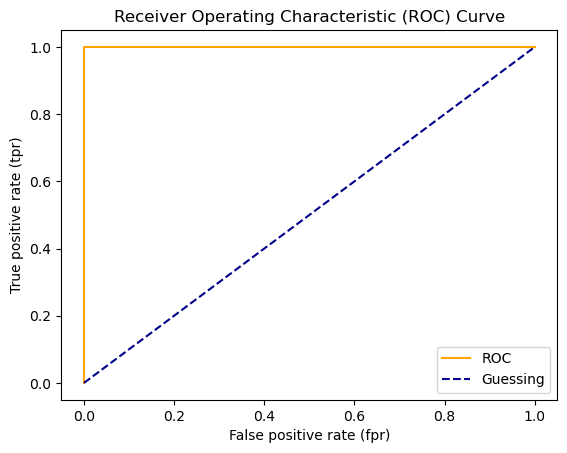

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr )



In [ ]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

**confusion matrix** <br>
The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
<br>
<br>
In essence, giving you an idea of where the model is getting confused.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. <br>
In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds )

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [ ]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual label"], colnames=["predicted labels"])

predicted labels,0,1
Actual label,,
0,24,5
1,4,28


There are 5 samples that are predicted to be 0 and actually are 1 (False negative) <br>
There are four samples that are predicted to be 1 and actually are 0 (False positive) <br>

The diagonal line is the true positive and true negative (*from 24 to 28*) - where the model predicts the correct label. <br>
the other diagnol line is the false positive and false negative (*from 5 to 4*) - where the model predicts the incorrect label.

### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. `sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)` - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
<br>
<br>
2. `sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)` - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.


<br>

*Note*: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

In [ ]:
24+5+4+28

61

In [ ]:
len(y_preds)

61

In [ ]:
# how to install package from jupyter notebook in the current environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Karti\Coding\MachineLearning\SampleProject\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       haa95532_0         123 KB
    certifi-2023.11.17         |  py311haa95532_0         160 KB
    jupyter_client-7.4.9       |  py311haa95532_0         278 KB
    jupyter_server-1.23.4      |  py311haa95532_0         459 KB
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    pyzmq-23.2.0               |  py311hd77b12b_0         476 KB
    seaborn-0.12.2             |  py311haa95532_0         583 KB
    ------------------------------------------------------------
                                           Total:         7.5 MB

The following NEW packages will be INSTALLED:

 



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

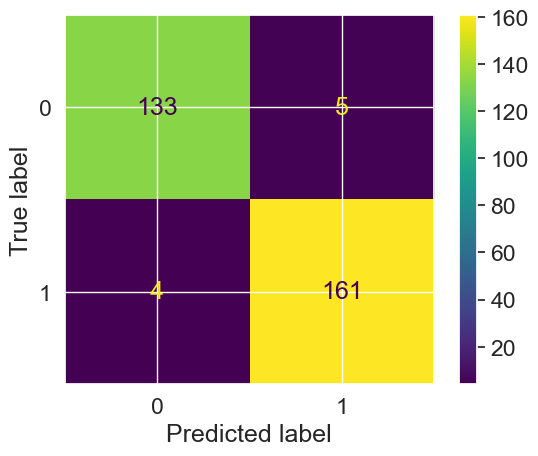

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

plt.show()

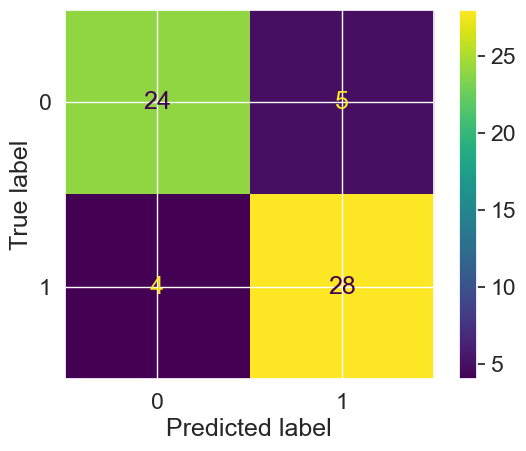

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification report** -- Collection of different Evaluation metrics

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# where precision and recall be ome valuable

disease_true = np.zeros(10000)
disease_true[10] = 1;

disease_preds = np.zeros(10000) #model predicts every case 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


It returns four columns: precision, recall, f1-score and support. <br> <br>

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.<br>  <br>

Each term measures something slightly different: <br><br>

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.<br><br>
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.<br><br>
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.<br><br>
* **Support** - The number of samples each metric was calculated on.<br><br>
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.<br><br>
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.<br><br>
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).<br><br><br>
When should you use each?
<br><br>
It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.<br><br>

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.
<br><br>
You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.
<br><br>
In this case, you'd want to turn to metrics such as precision, recall and F1 score.
<br><br>


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The One's we will focus on are: <br>
1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


### 1. **R^2 (pronounced r-squared) or coefficient of determination** -

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


C:\Users\Karti\AppData\Local\Temp\ipykernel_16668\3514621426.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = housing_df.drop("target", axis=1)
C:\Users\Karti\AppData\Local\Temp\ipykernel_16668\3514621426.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
model.score(X_test, y_test)

0.8065734772187598

In [ ]:
from sklearn.metrics import r2_score

# fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [ ]:
r2_score(y_true = y_test, y_pred=y_test_mean)

0.0

In [ ]:
r2_score(y_true = y_test, y_pred=y_test)

1.0

### 2. **Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. <br> <br>
It gives you an idea of how wrong your predictions were.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [ ]:
y_test1 = y_test.values.flatten()

In [ ]:
df = pd.DataFrame(data={"actual values": y_test1, "predicted values": y_preds})

df["diffrences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,diffrences
0,0.47700,0.493840,0.016840
1,0.45800,0.754940,0.296940
2,5.00001,4.928596,-0.071414
3,2.18600,2.543160,0.357160
4,2.78000,2.331760,-0.448240


In [ ]:
df["diffrences"].abs().mean()  # - TADA MEAN OF ABSOLUTE DIFFERNECES

0.32659871732073664

### 2. **Mean Square Error (MAE)**

MAE is the average of the squared differences between predictions and actual values. <br> <br>

It also has **(RMSE)** - root mean squared error which is the square root of the mean squared error. The lower the value, the better the model.

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [ ]:

df["diffrences squared"] = np.square(df["diffrences"])
df

,actual values,predicted values,diffrences,diffrences squared
0,0.47700,0.493840,0.016840,0.000284
1,0.45800,0.754940,0.296940,0.088173
2,5.00001,4.928596,-0.071414,0.005100
3,2.18600,2.543160,0.357160,0.127563
4,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
4123,2.63300,2.220380,-0.412620,0.170255
4124,2.66800,1.947760,-0.720240,0.518746
4125,5.00001,4.836378,-0.163632,0.026775
4126,0.72300,0.717820,-0.005180,0.000027


In [ ]:
np.square(df["diffrences"]).mean()

0.2534678520824551

## 4.2.3 Finally using the `scoring` parameter


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [ ]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5, scoring=None) # if scoring is NULL, estimator's default scoring evaluation metric is used (accuracy for classification model)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [ ]:
# PRECISION
np.random.seed(42)

# Cross-validation accuracy
cv_precision_acc = cross_val_score(clf,X,y,cv=5, scoring="precision") # if scoring is NULL, estimator's default scoring evaluation metric is used (accuracy for classification model)
cv_precision_acc

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
print(f"The cross-validated precision is: {np.mean(cv_precision_acc)*100:.2f}%")

The cross-validated precision is: 83.30%


In [ ]:
# RECALL

np.random.seed(42)

# Cross-validation accuracy
cv_recall_acc = cross_val_score(clf,X,y,cv=5, scoring="recall") # if scoring is NULL, estimator's default scoring evaluation metric is used (accuracy for classification model)
cv_recall_acc

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [ ]:
print(f"The cross-validated recall is: {np.mean(cv_recall_acc)*100:.2f}%")

The cross-validated recall is: 85.45%


Let's see `scoring` paeraameter in action for regression model. We'll try the `cross_val_score()` function.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

C:\Users\Karti\AppData\Local\Temp\ipykernel_17672\2257211884.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = housing_df.drop("target", axis=1)


In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3)

c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
np.mean(cv_r2)

0.6545458023124507

neg_mean_absolute_error is beacuse scoring parameter works on the higher the better principle but MAE and MSE work on the lower the better principle. so to make it work we put neg in front of it.

In [ ]:
# Mean absolute error
cv_mse = cross_val_score(model, X,y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


-0.4626304189468596

In [ ]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [ ]:
# Mean absolute error
cv_mae = cross_val_score(model, X,y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Karti\Coding\MachineLearning\SampleProject\env\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


-0.4820330437306202

In [ ]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

## 4.3 Using different evaluation metrics with Scikit-Learn

Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

**Classification functions** <br> <br>
For:

* Accuracy we can use sklearn.metrics.accuracy_score
* Precision we can use sklearn.metrics.precision_score
* Recall we can use sklearn.metrics.recall_score
* F1 we can use sklearn.metrics.f1_score

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


**Regression metrics**

We can use a similar setup for our regression problem, just with different methods. 

For:

* R^2 we can use sklearn.metrics.r2_score
* MAE (mean absolute error) we can use sklearn.metrics.mean_absolute_error
* MSE (mean squared error) we can use sklearn.metrics.mean_squared_error

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100, 
                              n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

C:\Users\Karti\AppData\Local\Temp\ipykernel_6308\2876217385.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = housing_df.drop("target", axis=1)
C:\Users\Karti\AppData\Local\Temp\ipykernel_6308\2876217385.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


## Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?
* Could we improve our model?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* parameters = model finds these patterns in data
* hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

we're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [65]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict


In [79]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split data into train, test, and validation
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data index
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 13% of data index after train split

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline prediction
y_preds = clf.predict(X_valid)

# Evaluate the model

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### Tuning the classifier model

In [67]:
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=50)
clf2.fit(X_train, y_train)

# make baseline prediction
y_preds_2 = clf.predict(X_valid)

# Evaluate the model

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### Hyperparameter tuning with RandomizedSearchCV 

In [68]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4],
        "max_features": ["log2", "sqrt"],
        "max_depth": [None,5, 10, 20, 30],
        }

np.random.seed(42)


# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)


clf = RandomForestClassifier(n_jobs=1)  # n_jobs mean how much of computer process you want to dedicate to you machine building model

# setup randomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv=5,
                            verbose=2)      

# Fit the randomizedSearchCV

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [69]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 20}

In [81]:
y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, y_preds)
rs_metrics

Acc: 89.13%
Precision: 0.95
Recall: 0.84
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.95, 'recall': 0.84, 'f1': 0.89}

### 5.3 Hyperparameter tuning with GridSearchCV

In [74]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [None, 5, 10, 20, 30]}

diffrence between RandomizedSearchCV and GridSearchCV is that RandomizedSearchCV tries random combinations of hyperparameters where as GridSearchCV tries all possible combinations of hyperparameters.

In [75]:
grid_2 = {'n_estimators': [100, 200, 500],
            'min_samples_split': [2],
            'min_samples_leaf': [4],
            'max_features': ['log2', 'sqrt'],
            'max_depth': [10,20,30]
            }

In [87]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)


# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)


clf = RandomForestClassifier(n_jobs=1)  # n_jobs mean how much of computer process you want to dedicate to you machine building model

# setup randomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                        param_grid=grid_2,
                        cv=5,
                        verbose=2)      

# Fit the randomizedSearchCV

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [78]:
gs_y_preds = rs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 81.97%
Precision: 0.87
Recall: 0.79
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83}

Let's compare our different models metrics.

<Axes: >

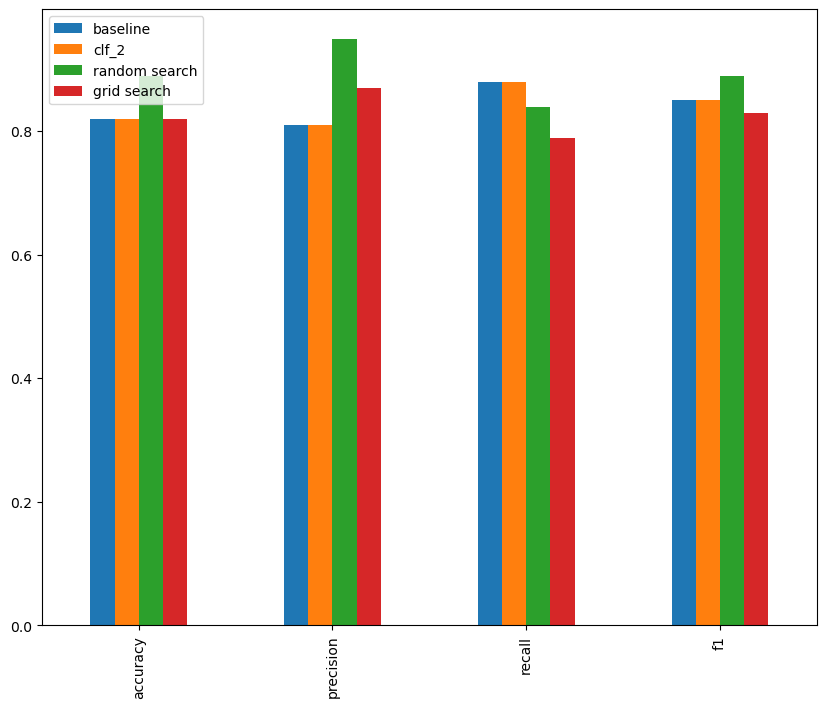

In [86]:
from IPython.core.pylabtools import figsize


compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics
                                })

compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module


**Pickle**

In [89]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("./model/gs_random_froest_model_1.pk", "wb"))

In [90]:
loaded_pickle_model = pickle.load(open("./model/gs_random_froest_model_1.pk", "rb"))

In [91]:
pickle_y_preds = loaded_pickle_model.predict(X_test)

pickle_y_preds_metrics = evaluate_preds(y_test, gs_y_preds)
pickle_y_preds_metrics

Acc: 81.97%
Precision: 0.87
Recall: 0.79
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83}

**Joblib**

In [92]:
from joblib import dump, load
# save the model

dump(gs_clf, filename="./model/gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [95]:
#import the model
loaded_joblib_model = load("./model/gs_random_forest_model_1.joblib")

In [96]:
joblib_y_preds = loaded_joblib_model.predict(X_test)

joblib_y_preds_metrics = evaluate_preds(y_test, gs_y_preds)
joblib_y_preds_metrics

Acc: 81.97%
Precision: 0.87
Recall: 0.79
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83}

# 7. Putting it all together!

In [97]:
data = pd.read_csv("./data/car-sales-extended-missing-data.csv") 
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [100]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [102]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data


In [106]:
# Getting data ready

from importlib import simple
from mistune import preprocessing
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

#import data and drop missing data row
data = pd.read_csv("./data/car-sales-extended-missing-data.csv") 
data.dropna(subset=["Price"], inplace=True)

# define diffrent features and transformer pipelinesP

categorical_feature = ["Make", "Colour"]
categorical_transfromer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_tranformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transfromer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transfromer, categorical_feature),
        ("door", door_tranformer, door_features),
        ("num", numeric_transfromer, numeric_features)
    ]
)

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

#split data

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2);

model.fit(X_train, y_train)
model.score(X_test, y_test) 


0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipline`.

In [110]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["log2"],
    "model__min_samples_split": [2,4],    
}

gs_model =  GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [111]:
gs_model.score(X_test, y_test)

0.2917586269126188